## Import the necessary basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

## Obtaining the dataset

In [2]:
oscars = pd.read_csv('fullOscarData.csv')
oscars

,Unnamed: 0,Title,Year,Genre,Genre 1,Rating,Runtime,Sales,Language,English Film,...,Cast1,Cast1 Rank,Cast2,Cast2 Rank,Cast3,Cast3 Rank,Sum of Cast Rankings,Country of Origin,Country of Origin 1,Number of Wins
0,0,Sunrise,1927,"Drama, Romance",Drama,8.1,94,121107,"None, English",No,...,George O'Brien,100000,Janet Gaynor,387,Margaret Livingston,100000,200387,United States,United States,3
1,1,Wings,1927,"Drama, Romance",Drama,7.6,144,746,English,Yes,...,Clara Bow,100000,Charles 'Buddy' Rogers,100000,Richard Arlen,100000,300000,United States,United States,1
2,2,Hollywood Revue,1928,"Comedy, Music",Comedy,5.8,130,5277780,English,Yes,...,Conrad Nagel,100000,Jack Benny,100000,John Gilbert,100000,300000,United States,United States,0
3,3,Morocco,1930,"Drama, Romance",Drama,7.0,92,191,"English, French, Spanish, Arabic, Italian",Yes,...,Gary Cooper,71,Marlene Dietrich,241,Adolphe Menjou,100000,100312,United States,United States,0
4,4,The Public Enemy,1930,"Crime, Drama",Crime,7.6,83,1214260,English,Yes,...,James Cagney,40,Jean Harlow,244,Edward Woods,100000,100284,United States,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1653,Frozen II,2019,"Animation, Adventure",Animation,6.8,103,1450026933,English,Yes,...,Kristen Bell,332,Idina Menzel,100000,Josh Gad,959,101291,United States,United States,0
1654,1654,Ad Astra,2019,"Adventure, Drama",Adventure,6.5,123,127461872,"English, Norwegian",Yes,...,Brad Pitt,120,Tommy Lee Jones,103,Ruth Negga,100000,100223,"China, United States, Brazil",China,0
1655,1655,Avengers: Endgame,2019,"Action, Adventure",Action,8.4,181,2797501328,"English, Japanese, Xhosa, German",Yes,...,Robert Downey Jr.,125,Chris Evans,457,Mark Ruffalo,516,1098,United States,United States,0
1656,1656,The Lion King,2019,"Animation, Adventure",Animation,6.8,118,1662899439,"English, Xhosa, Zulu, French, Spanish, Hindi",Yes,...,Donald Glover,100000,Beyoncé,831,Seth Rogen,462,101293,"United States, United Kingdom",United States,0


## Attempting to predict the number of wins a nominated film would achieve

### Encoding the categorical variables

In [3]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
oscars_cat = oscars[['Genre 1', 'English Film', 'Age Rating', 'Country of Origin 1']]
ohe.fit(oscars_cat)

OneHotEncoder()

In [4]:
oscars_cat_ohe = pd.DataFrame(ohe.transform(oscars_cat).toarray(), columns=ohe.get_feature_names(oscars_cat.columns))

# Check the encoded variables
oscars_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 74 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Genre 1_Action                                      1658 non-null   float64
 1   Genre 1_Adventure                                   1658 non-null   float64
 2   Genre 1_Animation                                   1658 non-null   float64
 3   Genre 1_Biography                                   1658 non-null   float64
 4   Genre 1_Comedy                                      1658 non-null   float64
 5   Genre 1_Crime                                       1658 non-null   float64
 6   Genre 1_Documentary                                 1658 non-null   float64
 7   Genre 1_Drama                                       1658 non-null   float64
 8   Genre 1_Family                                      1658 non-null   float64
 9

C:\Users\verno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Obtaining the predictors and response variables

In [5]:
oscars_num = oscars[['Sales', 'Runtime', 'Rating', 'Director Rank', 'Sum of Cast Rankings']]
wins = pd.DataFrame(oscars['Number of Wins']) # Response
var = pd.concat([oscars_num, oscars_cat_ohe], sort = False, axis = 1).reindex(index=oscars_num.index) #Predictors

### Obtaining the train-test split

In [6]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the Dataset into Train and Test
wins_train, wins_test, var_train, var_test = train_test_split(wins, var, test_size = 0.20, random_state=3)

# Check the sample sizes
print("Train Set :", wins_train.shape, var_train.shape)
print("Test Set  :", wins_test.shape, var_test.shape)

Train Set : (1326, 1) (1326, 79)
Test Set  : (332, 1) (332, 79)


### Modelling the response based on the predictors

#### Decision Tree

[Text(0.3409502001231527, 0.9615384615384616, 'Rating <= 7.15\ngini = 0.517\nsamples = 1326\nvalue = [881, 253, 75, 42, 29, 20, 6, 10, 4, 2, 1, 3]\nclass = 0'),
 Text(0.09906096059113301, 0.8846153846153846, 'Sales <= 82546.5\ngini = 0.323\nsamples = 494\nvalue = [401, 63, 17, 7, 1, 2, 0, 3, 0, 0, 0, 0]\nclass = 0'),
 Text(0.024630541871921183, 0.8076923076923077, 'Sum of Cast Rankings <= 200530.5\ngini = 0.598\nsamples = 25\nvalue = [14, 7, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]\nclass = 0'),
 Text(0.021346469622331693, 0.7307692307692307, 'Sales <= 12940.0\ngini = 0.685\nsamples = 17\nvalue = [6, 7, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]\nclass = 1'),
 Text(0.013136288998357963, 0.6538461538461539, 'Runtime <= 125.5\ngini = 0.645\nsamples = 11\nvalue = [6, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]\nclass = 0'),
 Text(0.006568144499178982, 0.5769230769230769, 'Genre 1_Biography <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.003284072249589491, 0.5, 'gini = 

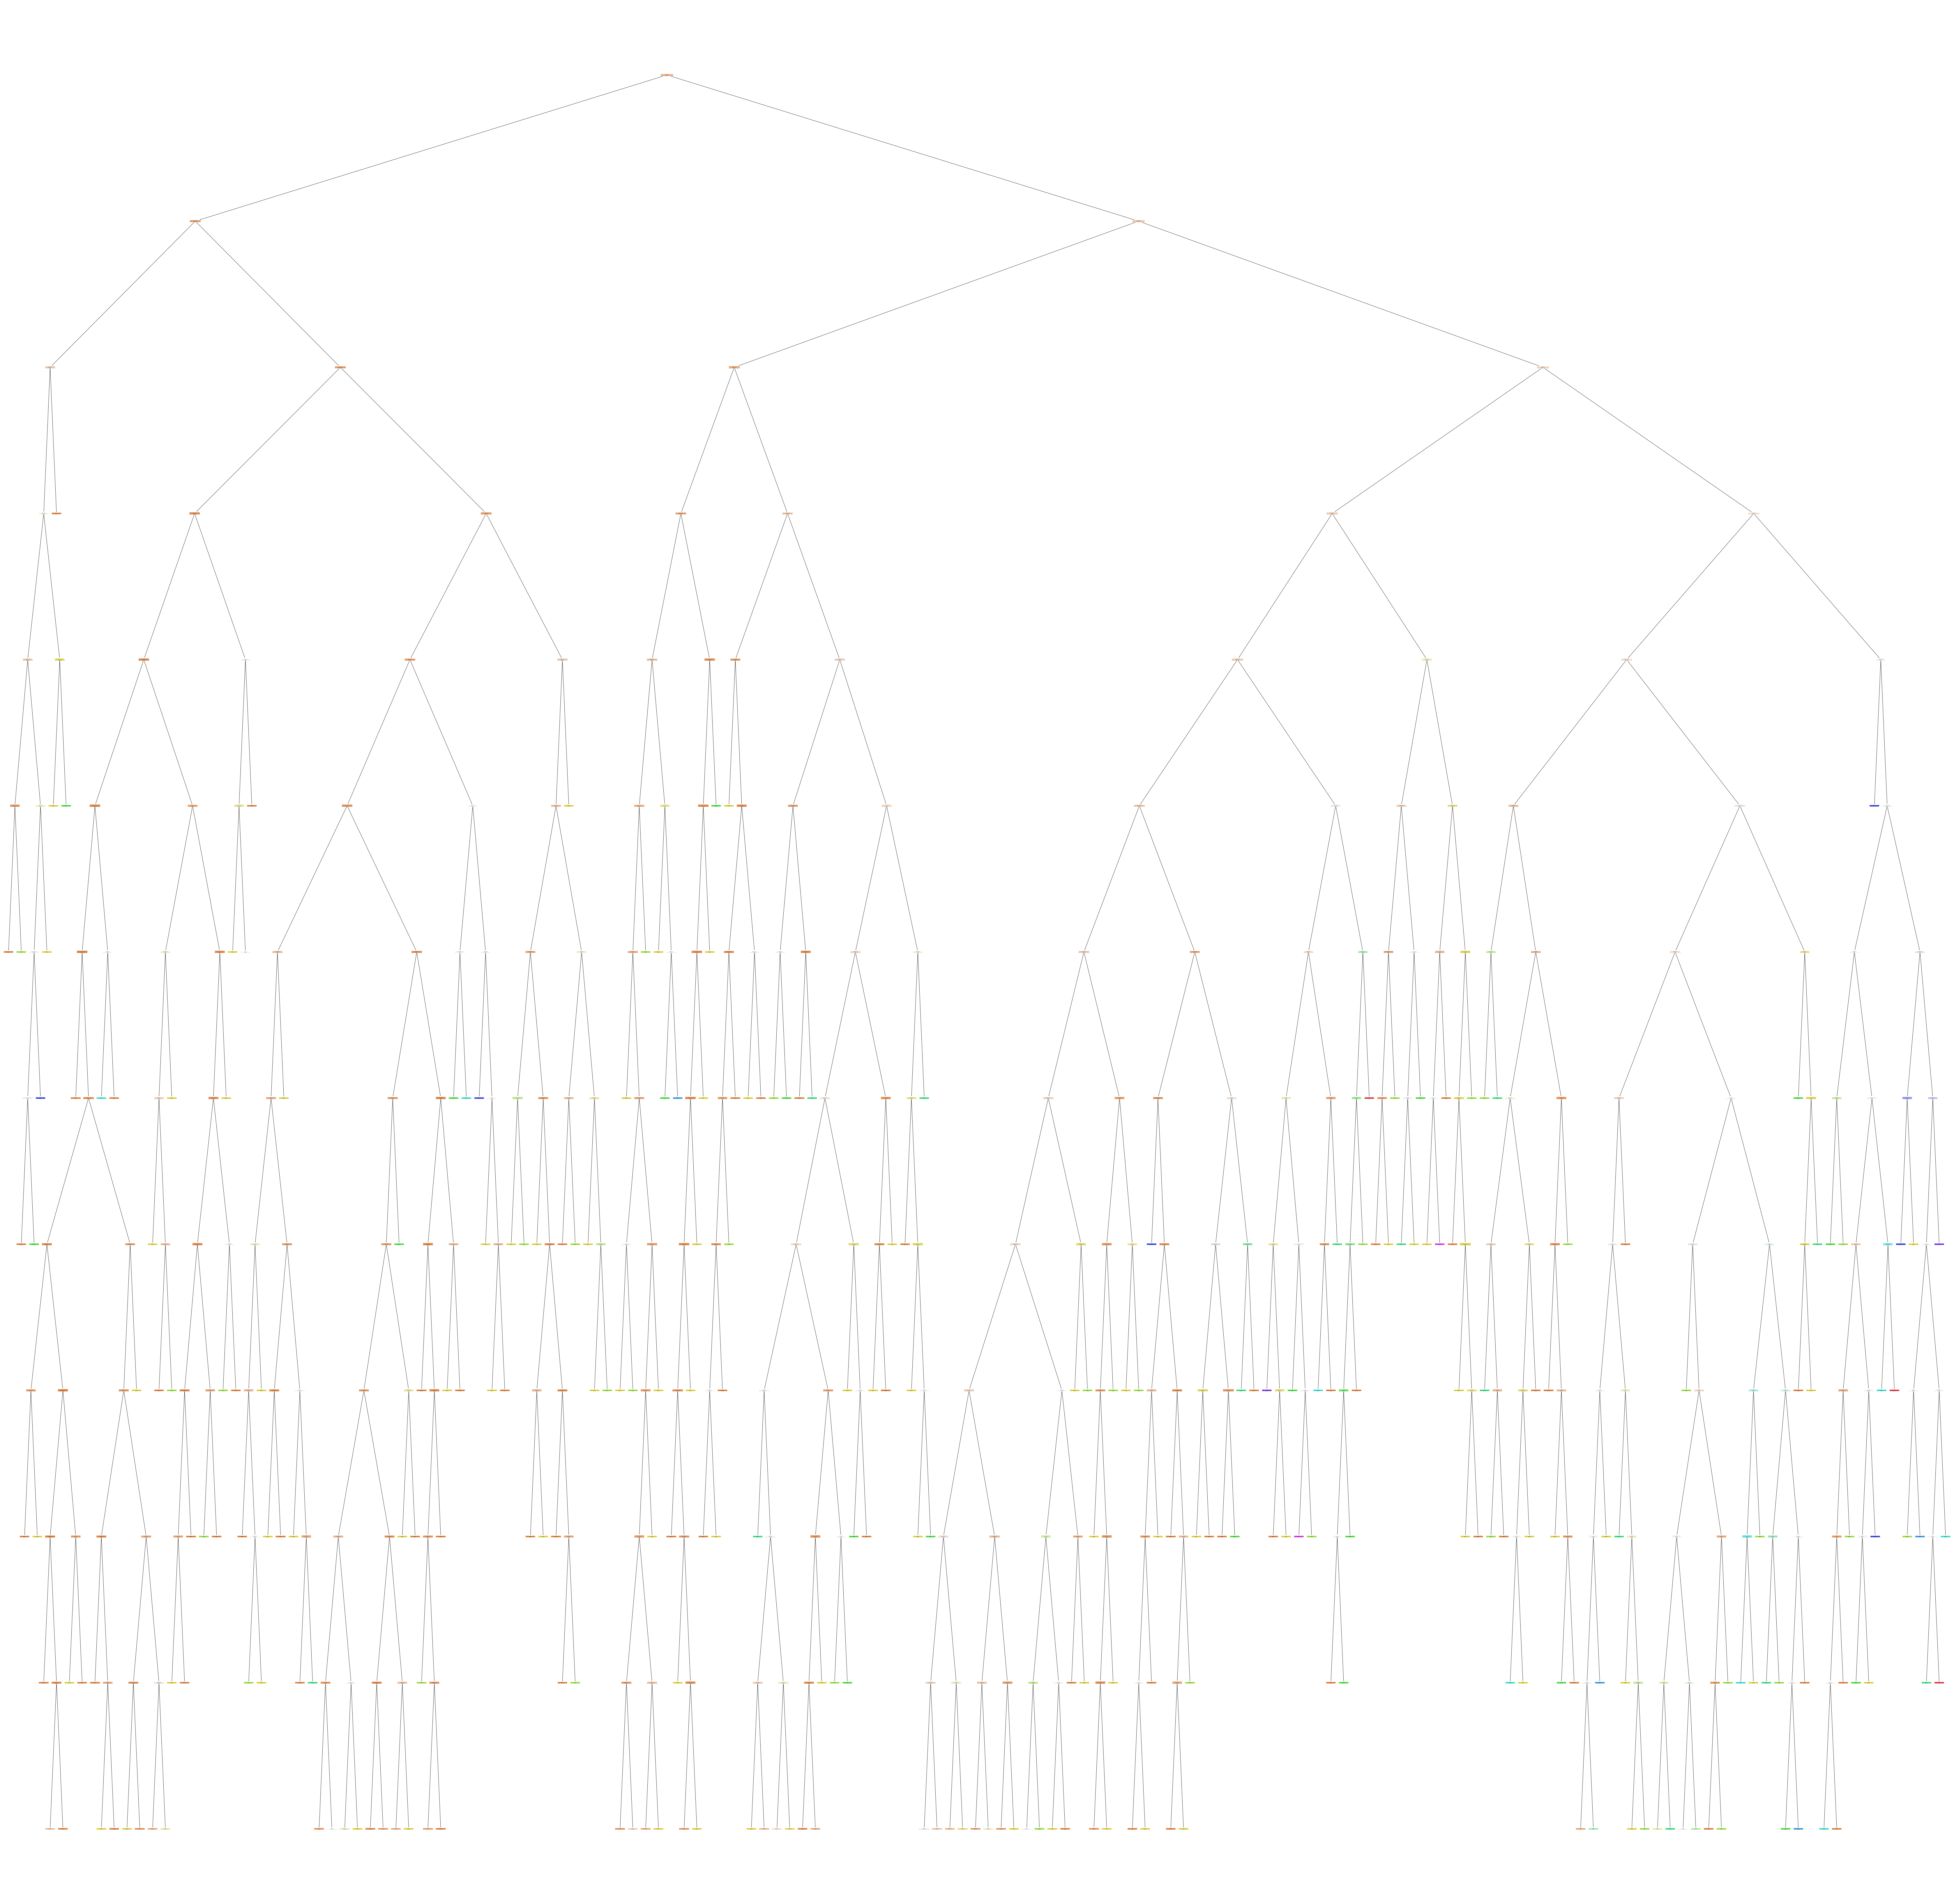

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 12)
dectree.fit(var_train, wins_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(120,120))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=var_train.columns, 
          class_names=["0","1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"])

#### Evaluating the model

Due to the large number of possible classes, a high depth limit is required, making a decision tree unsuitable for modelling this problem. It is impractical as it requires us to save the resulting tree as a separate image to be able to even examine the prediction made.

### Linear Regression

Intercept of Regression 	: b =  [-5.72950503]
Coefficients of Regression 	: a =  [[ 5.73619268e-10  1.49935885e-02  5.70296230e-01  2.15683341e-06
  -2.94296207e-07 -1.85004528e-01  3.68753461e-02 -4.02026470e-01
   2.53612020e-01  8.11055625e-02 -7.54119018e-02 -2.04586318e-01
   1.27221258e-01  3.36841666e-12  5.58591609e-01 -1.03088527e-01
   2.38617484e-01  3.16931064e-03 -6.02143022e-01 -4.65675401e-01
   1.75646163e+00 -1.01771806e+00 -6.76695182e-02  6.76695182e-02
  -8.14094380e-01  2.23714112e-01  6.91895651e-01 -1.83104912e-01
   2.37979395e-03 -2.30229601e-01 -7.46534082e-03 -1.96382474e-01
   5.36290753e-01 -2.30036033e-02  2.94757465e-03 -3.50373974e-01
   9.06654492e-01  2.93213243e-01 -6.01711267e-03 -7.61559920e-02
   1.74643274e-01  1.05799530e+00 -8.02529641e-01 -3.61015526e-01
  -4.82557295e-01 -3.21601954e-01 -1.97975793e-01  1.43383957e-02
  -2.22523575e-01  2.05042972e-01  1.98357390e-01 -2.42892838e+00
   1.78096807e-01 -1.20015447e-01  2.31344492e-02  1.73530631

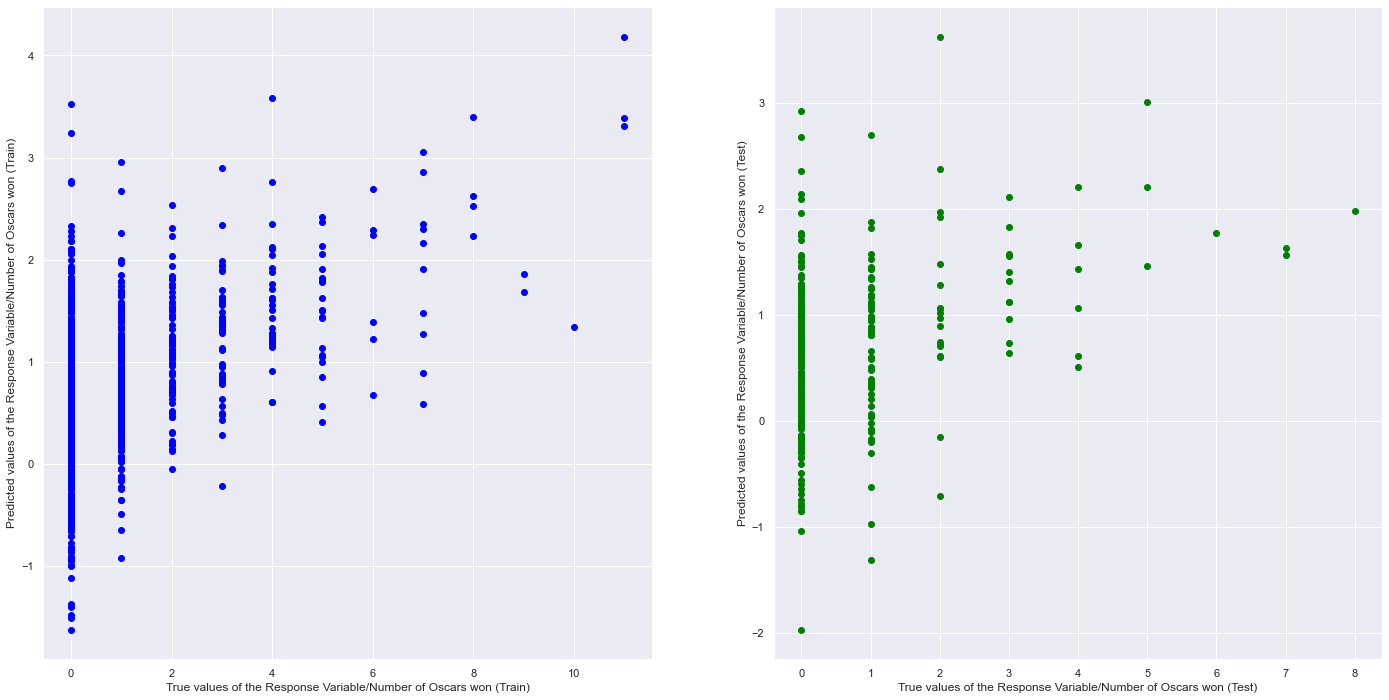

In [8]:
# Linear Regression using Train Data
linreg = lm.LinearRegression()         # create the linear regression object
linreg.fit(var_train, wins_train)        # train the linear regression model

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

wins_train_pred = linreg.predict(var_train)
wins_test_pred = linreg.predict(var_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))


axes[0].scatter(wins_train, wins_train_pred, color = "blue")
axes[0].set_xlabel("True values of the Response Variable/Number of Oscars won (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable/Number of Oscars won (Train)")
axes[1].scatter(wins_test, wins_test_pred, color = "green")
axes[1].set_xlabel("True values of the Response Variable/Number of Oscars won (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable/Number of Oscars won (Test)")
plt.show()

#### Evaluating the model

In [9]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(var_train, wins_train))
print()

print("Prediction Accuracy \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(wins_test, wins_test_pred))
print()
print("Root Mean Squared Error \t:", mean_squared_error(wins_test, wins_test_pred, squared=False))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2268145782086718

Prediction Accuracy 	Test Dataset
Mean Squared Error (MSE) 	: 1.3718686369232855

Root Mean Squared Error 	: 1.171267961195595



The explained variance of our model is fairly low, at around 0.227, so it may not be a good fit for the problem we are modelling. The mean squared error and root mean squared error are 1.37 and 1.17 respectively, which is poor as it may result in a film that does not receive an Oscar being predicted to win one or vice versa. Finally, it predicts some negative response values, which is not possible as there is no such thing as winning a negative number of Oscars. However, this is the better model in comparison to the decision tree as it gives a numeric prediction.